In [1]:
class TreeNode:
    def __init__(self,x):
        self.val=x
        self.left=None
        self.right=None

### Creating a Tree from an Individual Node

In [2]:
t1=TreeNode(1)
t1.left=TreeNode(2)
t1.right=TreeNode(3)

In [3]:
from graphviz import Digraph

def visualize(tree):
    if tree is None:
        return "Nothing in the tree"
    
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.attr('node', shape='circle')
            dot.node(name=str(tree.val), label=str(tree.val))

        # Add left and right children
        for child in [tree.left, tree.right]: 
            if child is not None:
                dot.node(name=str(child.val), label=str(child.val))  # Unique name based on value
                dot.edge(str(tree.val), str(child.val))  # Connect parent to child
                dot = add_nodes_edges(child, dot=dot)  # Recursively add children

        return dot  

    dot = add_nodes_edges(tree)
    display(dot) 

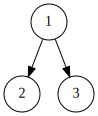

In [4]:
visualize(t1)

### BINARY SEARCH TREE


In [5]:
class BST(TreeNode):
    def __init__(self, val,parent=None):
        super().__init__(val)
        self.parent=parent
    def insert(self,val):
        if val < self.val:
            if self.left is None:   
                new_node=BST(val,parent=self)
                self.left=new_node
            else:
                self.left.insert(val)

        else:
            if self.right is None:
                self.right=BST(val,parent=self)
            else:
                self.right.insert(val)

In [6]:
b1=BST(20)
print(b1.val)

20


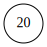

In [7]:
visualize(b1)

In [8]:
b1.insert(24)


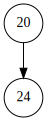

In [9]:
visualize(b1)

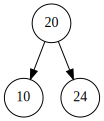

In [10]:
b1.insert(10)
visualize(b1)

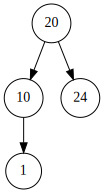

In [11]:
b1.insert(1)
visualize(b1)

In [12]:
b1.insert(21)
b1.insert(26)
b1.insert(25)

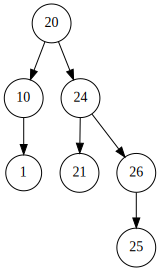

In [14]:
visualize(b1)

### DELETION FROM BST

In [15]:
def find_root(self):
    """ Find the absolute root of the BST to which self belongs.Keep going you reach """
    temp=self
    while temp.parent is not None:
        temp=temp.parent

    return temp

BST.find_root=find_root    


In [17]:
def find_min(self):
    """ Find the minimu mvalue staruing from self In BST this is simple keep going
    left until there is no left  """
    min_node=self

    if self.left is not None:
        min_node=self.left.find_min()

    return min_node

BST.find_min=find_min    

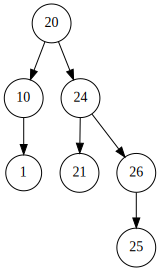

Minimum is  1


In [20]:
visualize(b1)
print('Minimum is ',b1.find_min().val)

In [21]:
def set_for_parent(self,new_ref):
    """ Dsiconnect Self from parent and attach new_ref to parent in self's place.."""
    if self.parent is None: return

    if self.parent.right==self:
        self.parent.right=new_ref
    if self.parent.left==self:
        self.parent.left=new_ref

BST.set_for_parent=set_for_parent
        

In [23]:
def replace_with_node(self,node):
        """  Replace self with node(which is a child ).Make sure to fix the parent of the node 
          Assume we have no children other than node  """
        
        self.set_for_parent(node)
        node.parent=self.parent
        self.parent=None
        return node.find_root()

BST.replace_with_node=replace_with_node

In [24]:
def delete(self,val):
    
    ## Case 1 we are alone there is no children no parent just root node and value matches
    if self.parent is None and self.right is None and self.left is None and self.val==val:
        return None
    if self.val==val:
        ##check if we are leaf
        if self.right is None and self.left is None:
            self.set_for_parent(None)
            return self.find_root()
        ##check if we have just one left node
        if self.right is None:
            return self.replace_with_node(self.left)
        if self.left is None:
            return self.replace_with_node(self.right)
        
        ## Now we have both children left and right
        successor=self.right.find_min()
        self.val=successor.val
    ## we are not the  node to be deleted
    
    if val<self.val:
        if self.left is not None:
            return self.left.delete(val)
        else:
            return self.find_root() ## nothing to be deleted
    else:
        if self.right is not None:
            return self.right.delete(val)
        else:
            return self.find_root()


BST.delete=delete                
